In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve#, plot_confusion_matrix

In [2]:
dataset = pd.read_csv('Book1_edit_2.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=44)

# XGBoost Normal

accuracy:    1.0 f1-score:    1.0 precision:   1.0 recall:      1.0 sensitivity: 1.0 specificity: 1.0 




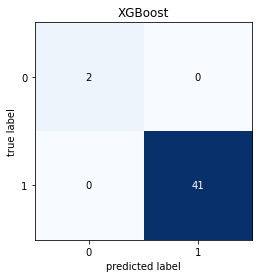

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=935)
classifier = XGBClassifier(learning_rate=0.0991, gamma=0, n_estimators = 80)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
    
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('XGBoost')
plt.savefig('XGBoost_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('accuracy:   ', accuracy_score(y_test, y_pred)
         , 'f1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , 'precision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , 'recall:     ', recall_score(y_test, y_pred, average='weighted')
         , 'sensitivity:', sensitivity
         , 'specificity:', specificity, '\n\n')

# K-Fold

In [4]:
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, random_state=722, shuffle=True)
kf.get_n_splits(X)
i=1
accuracy_av = f1_score_av = precision_av = recall_av = sensitivity_av = specificity_av = 0


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier = XGBClassifier(learning_rate=0.0991, gamma=0, n_estimators = 80, eta = 0.255)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    
    print('Fold ', i, ':\n        accuracy:   ', accuracy_score(y_test, y_pred)
         , '\n        f1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\n        precision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\n        recall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\n        sensitivity:', sensitivity
         , '\n        specificity:', specificity, '\n\n')
    
    accuracy_av+=accuracy_score(y_test, y_pred) / k
    f1_score_av+=f1_score(y_test, y_pred, average='weighted') / k
    precision_av+=precision_score(y_test, y_pred, average='weighted',  zero_division=0) / k
    recall_av+=recall_score(y_test, y_pred, average='weighted') / k
    sensitivity_av+=sensitivity / k
    specificity_av+=specificity / k
    
    i+=1

print('Averages:', '\n        accuracy average:   ', accuracy_av
    , '\n        f1-score average:   ', f1_score_av
    , '\n        precision average:  ', precision_av
    , '\n        recall average:     ', recall_av
    , '\n        sensitivity average:', sensitivity_av
    , '\n        specificity average:', specificity_av, '\n\n')
    

[[ 0  4]
 [ 0 39]]
Fold  1 :
        accuracy:    0.9069767441860465 
        f1-score:    0.8627339761769711 
        precision:   0.8226068144943213 
        recall:      0.9069767441860465 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 0  5]
 [ 0 37]]
Fold  2 :
        accuracy:    0.8809523809523809 
        f1-score:    0.8251959011452682 
        precision:   0.7760770975056689 
        recall:      0.8809523809523809 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 1  3]
 [ 0 38]]
Fold  3 :
        accuracy:    0.9285714285714286 
        f1-score:    0.9084990958408681 
        precision:   0.9337979094076655 
        recall:      0.9285714285714286 
        sensitivity: 0.25 
        specificity: 1.0 


[[ 2  3]
 [ 0 37]]
Fold  4 :
        accuracy:    0.9285714285714286 
        f1-score:    0.914656771799629 
        precision:   0.9339285714285714 
        recall:      0.9285714285714286 
        sensitivity: 0.4 
        specificity: 1.0 


[[ 1  6]
 [ 

# Stratified K-Fold

In [5]:
from sklearn.model_selection import StratifiedKFold
k=4
kf = StratifiedKFold(n_splits=k, random_state=52, shuffle=True)
kf.get_n_splits(X)
i=1
accuracy_av = f1_score_av = precision_av = recall_av = sensitivity_av = specificity_av = 0


for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier = XGBClassifier(learning_rate=0.0991, gamma=0, n_estimators = 80, eta = 0.255)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    
    print('Fold ', i, ':\n        accuracy:   ', accuracy_score(y_test, y_pred)
         , '\n        f1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\n        precision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\n        recall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\n        sensitivity:', sensitivity
         , '\n        specificity:', specificity, '\n\n')
    
    accuracy_av+=accuracy_score(y_test, y_pred) / k
    f1_score_av+=f1_score(y_test, y_pred, average='weighted') / k
    precision_av+=precision_score(y_test, y_pred, average='weighted',  zero_division=0) / k
    recall_av+=recall_score(y_test, y_pred, average='weighted') / k
    sensitivity_av+=sensitivity / k
    specificity_av+=specificity / k
    
    i+=1

print('Averages:', '\n        accuracy average:   ', accuracy_av
    , '\n        f1-score average:   ', f1_score_av
    , '\n        precision average:  ', precision_av
    , '\n        recall average:     ', recall_av
    , '\n        sensitivity average:', sensitivity_av
    , '\n        specificity average:', specificity_av, '\n\n')
    

[[ 1  5]
 [ 0 47]]
Fold  1 :
        accuracy:    0.9056603773584906 
        f1-score:    0.8743499686895915 
        precision:   0.9147314949201742 
        recall:      0.9056603773584906 
        sensitivity: 0.16666666666666666 
        specificity: 1.0 


[[ 1  5]
 [ 0 47]]
Fold  2 :
        accuracy:    0.9056603773584906 
        f1-score:    0.8743499686895915 
        precision:   0.9147314949201742 
        recall:      0.9056603773584906 
        sensitivity: 0.16666666666666666 
        specificity: 1.0 


[[ 0  7]
 [ 0 46]]
Fold  3 :
        accuracy:    0.8679245283018868 
        f1-score:    0.8065561273108443 
        precision:   0.7532929868280528 
        recall:      0.8679245283018868 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 2  4]
 [ 0 46]]
Fold  4 :
        accuracy:    0.9230769230769231 
        f1-score:    0.905448717948718 
        precision:   0.9292307692307692 
        recall:      0.9230769230769231 
        sensitivity: 0.333333333333

# SVM


accuracy:    0.9534883720930233 
f1-score:    0.9534883720930233 
precision:   0.9534883720930233 
recall:      0.9534883720930233 
sensitivity: 0.5 
specificity: 0.975609756097561 




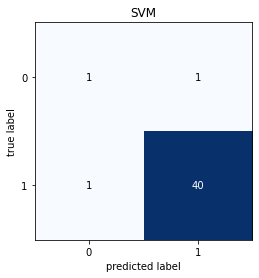

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0, degree=3, gamma='scale')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('SVM')
plt.savefig('SVM_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')

# Random forest


accuracy:    0.9534883720930233 
f1-score:    0.9606589147286823 
precision:   0.9767441860465116 
recall:      0.9534883720930233 
sensitivity: 1.0 
specificity: 0.9512195121951219 




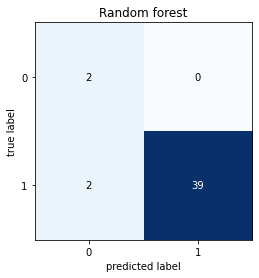

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 120)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('Random forest')
plt.savefig('RF_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')

In [36]:
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, random_state=722, shuffle=True)
kf.get_n_splits(X)
i=1
accuracy_av = f1_score_av = precision_av = recall_av = sensitivity_av = specificity_av = 0


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 120)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    
    print('Fold ', i, ':\n        accuracy:   ', accuracy_score(y_test, y_pred)
         , '\n        f1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\n        precision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\n        recall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\n        sensitivity:', sensitivity
         , '\n        specificity:', specificity, '\n\n')
    
    accuracy_av+=accuracy_score(y_test, y_pred) / k
    f1_score_av+=f1_score(y_test, y_pred, average='weighted') / k
    precision_av+=precision_score(y_test, y_pred, average='weighted',  zero_division=0) / k
    recall_av+=recall_score(y_test, y_pred, average='weighted') / k
    sensitivity_av+=sensitivity / k
    specificity_av+=specificity / k
    
    i+=1

print('Averages:', '\n        accuracy average:   ', accuracy_av
    , '\n        f1-score average:   ', f1_score_av
    , '\n        precision average:  ', precision_av
    , '\n        recall average:     ', recall_av
    , '\n        sensitivity average:', sensitivity_av
    , '\n        specificity average:', specificity_av, '\n\n')
    

[[ 0  4]
 [ 5 34]]
Fold  1 :
        accuracy:    0.7906976744186046 
        f1-score:    0.80096647538508 
        precision:   0.8115055079559362 
        recall:      0.7906976744186046 
        sensitivity: 0.0 
        specificity: 0.8717948717948718 


[[ 0  5]
 [ 0 37]]
Fold  2 :
        accuracy:    0.8809523809523809 
        f1-score:    0.8251959011452682 
        precision:   0.7760770975056689 
        recall:      0.8809523809523809 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 2  2]
 [ 1 37]]
Fold  3 :
        accuracy:    0.9285714285714286 
        f1-score:    0.9239332096474955 
        precision:   0.9218559218559218 
        recall:      0.9285714285714286 
        sensitivity: 0.5 
        specificity: 0.9736842105263158 


[[ 2  3]
 [ 0 37]]
Fold  4 :
        accuracy:    0.9285714285714286 
        f1-score:    0.914656771799629 
        precision:   0.9339285714285714 
        recall:      0.9285714285714286 
        sensitivity: 0.4 
        speci

# CatBoost

0:	learn: 0.4596457	total: 640us	remaining: 12.2ms
1:	learn: 0.3840671	total: 1.4ms	remaining: 12.6ms
2:	learn: 0.3504979	total: 1.98ms	remaining: 11.2ms
3:	learn: 0.3165157	total: 2.62ms	remaining: 10.5ms
4:	learn: 0.2992972	total: 3.16ms	remaining: 9.48ms
5:	learn: 0.2937405	total: 3.63ms	remaining: 8.48ms
6:	learn: 0.2841357	total: 4.21ms	remaining: 7.83ms
7:	learn: 0.2757572	total: 4.74ms	remaining: 7.11ms
8:	learn: 0.2677792	total: 5.21ms	remaining: 6.37ms
9:	learn: 0.2634368	total: 5.6ms	remaining: 5.6ms
10:	learn: 0.2586677	total: 6.05ms	remaining: 4.95ms
11:	learn: 0.2479878	total: 6.52ms	remaining: 4.35ms
12:	learn: 0.2318818	total: 6.99ms	remaining: 3.76ms
13:	learn: 0.2266271	total: 7.45ms	remaining: 3.19ms
14:	learn: 0.2237123	total: 7.91ms	remaining: 2.64ms
15:	learn: 0.2220806	total: 8.37ms	remaining: 2.09ms
16:	learn: 0.2092579	total: 8.82ms	remaining: 1.56ms
17:	learn: 0.2074849	total: 9.27ms	remaining: 1.03ms
18:	learn: 0.2048691	total: 9.73ms	remaining: 512us
19:	lear

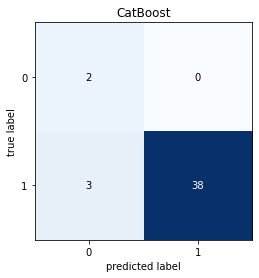

In [23]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(iterations=20, learning_rate=0.44, max_depth=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('CatBoost')
plt.savefig('CatBoost_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')

# LightGBM

[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8

accuracy:    0.9534883720930233 
f1-score:    0.9307862679955704 
precision:   0.9091400757166036 
recall:      0.9534883720930233 
sensitivity: 0.0 
specificity: 1.0 




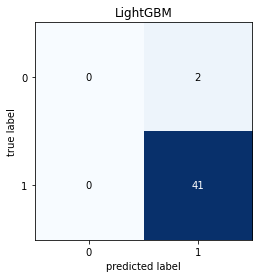

In [35]:
from lightgbm import LGBMClassifier
classifier = LGBMClassifier(n_estimators = 20, num_threads = 8, bagging_fraction = 1, max_depth = 6)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('LightGBM')
plt.savefig('LightGBM_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')